In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.isnull().sum() / len(df) * 100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [ ]:
df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [ ]:
temp = dict(df.nunique())
columns = dict( (key, value) for (key, value) in temp.items() if value < 20 )
for col in columns.keys():
  print(f"Unique values in {col}: {sorted(list(df[col].unique()))}")

Unique values in Attrition: ['No', 'Yes']
Unique values in BusinessTravel: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Unique values in Department: ['Human Resources', 'Research & Development', 'Sales']
Unique values in Education: [1, 2, 3, 4, 5]
Unique values in EducationField: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Unique values in EnvironmentSatisfaction: [1, 2, 3, 4]
Unique values in Gender: ['Female', 'Male']
Unique values in JobInvolvement: [1, 2, 3, 4]
Unique values in JobLevel: [1, 2, 3, 4, 5]
Unique values in JobRole: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
Unique values in JobSatisfaction: [1, 2, 3, 4]
Unique values in MaritalStatus: ['Divorced', 'Married', 'Single']
Unique values in NumCompaniesWorked: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Unique values in OverTime: ['

In [ ]:
color_map = {'Yes': '#E63725', 'No': '#5F9EE6'}

In [ ]:
fig = px.pie(df, names = 'Attrition', title = 'Attrition Values Percentage')
fig.update_traces(rotation=90, textinfo = "percent+label")

In [ ]:
temp = df.groupby(['Gender', 'Attrition']).size().unstack()
px.bar(temp, x=temp.index, y=temp.columns, color_discrete_map=color_map, barmode='group', text_auto=True)

In [ ]:
px.histogram(df, x='YearsSinceLastPromotion', color='Attrition', color_discrete_map=color_map, text_auto=True)

In [ ]:
temp = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
px.bar(temp, x=temp.index, y=temp.columns, color_discrete_map=color_map, barmode='group', text_auto=True)

In [ ]:
px.histogram(df, x='DistanceFromHome', color='Attrition', color_discrete_map=color_map, barmode='overlay', text_auto=True)

In [ ]:
px.histogram(df, x='Department', color='Attrition', barmode='group', color_discrete_map=color_map, text_auto=True)

In [ ]:
temp = df[df['Attrition'] == 'Yes'].value_counts('JobRole').sort_values(ascending=False)
fig = px.bar(temp, x =temp.index, y=temp.values, text_auto=True, title='Number of employees left according to their role')
fig.update_xaxes(tickangle=270)

In [ ]:
px.histogram(df, x='EducationField', color='Attrition', barmode='group', color_discrete_map=color_map, text_auto=True)

In [ ]:
ff.create_distplot([df['MonthlyIncome']], ['MonthlyIncome'])

In [ ]:
ff.create_distplot([df['Age']], ['Age'])

In [ ]:
px.box(df, x='Attrition', y='MonthlyIncome', color='Attrition', points='all', color_discrete_map=color_map)

In [ ]:
temp = df.groupby(['OverTime', 'Attrition']).size().unstack()
px.bar(temp, x=temp.index, color_discrete_map=color_map, barmode='group', text_auto=True)

In [ ]:
px.histogram(df, x='EnvironmentSatisfaction', color='Attrition', color_discrete_map=color_map)

In [ ]:
px.histogram(df, x='JobSatisfaction', color='Attrition', color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="Age", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="WorkLifeBalance", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="TotalWorkingYears", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="YearsInCurrentRole", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="PercentSalaryHike", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="YearsWithCurrManager", color="Attrition", marginal="box", color_discrete_map=color_map)

In [ ]:
px.histogram(df, x="Attrition", color="Education", barmode='group', category_orders={"Education": sorted(list(df['Education']))})

In [ ]:
px.histogram(data_frame=df, y='EducationField', orientation='h', color='Attrition', barmode='group', title='Attrition by Job Role',
             category_orders={"EducationField": df["EducationField"].value_counts().index.tolist()},
             color_discrete_map=color_map)

In [ ]:
high_performance_and_stayed = df[(df["PerformanceRating"] == 4) & (df["Attrition"] == "No")].groupby("JobRole").size()
fig = px.pie(high_performance_and_stayed, values=high_performance_and_stayed.values, names=high_performance_and_stayed.index, hole=0.2)
fig.update_traces(rotation=20, textposition='inside', textinfo='percent+label')

In [ ]:
high_performance_and_left = df[(df["PerformanceRating"] == 4) & (df["Attrition"] == "Yes")].groupby("JobRole").size()
fig = px.pie(high_performance_and_left, values=high_performance_and_left.values, names=high_performance_and_left.index, hole=0.2)
fig.update_traces(rotation=-35, textposition='inside', textinfo='percent+label')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])


<Axes: >

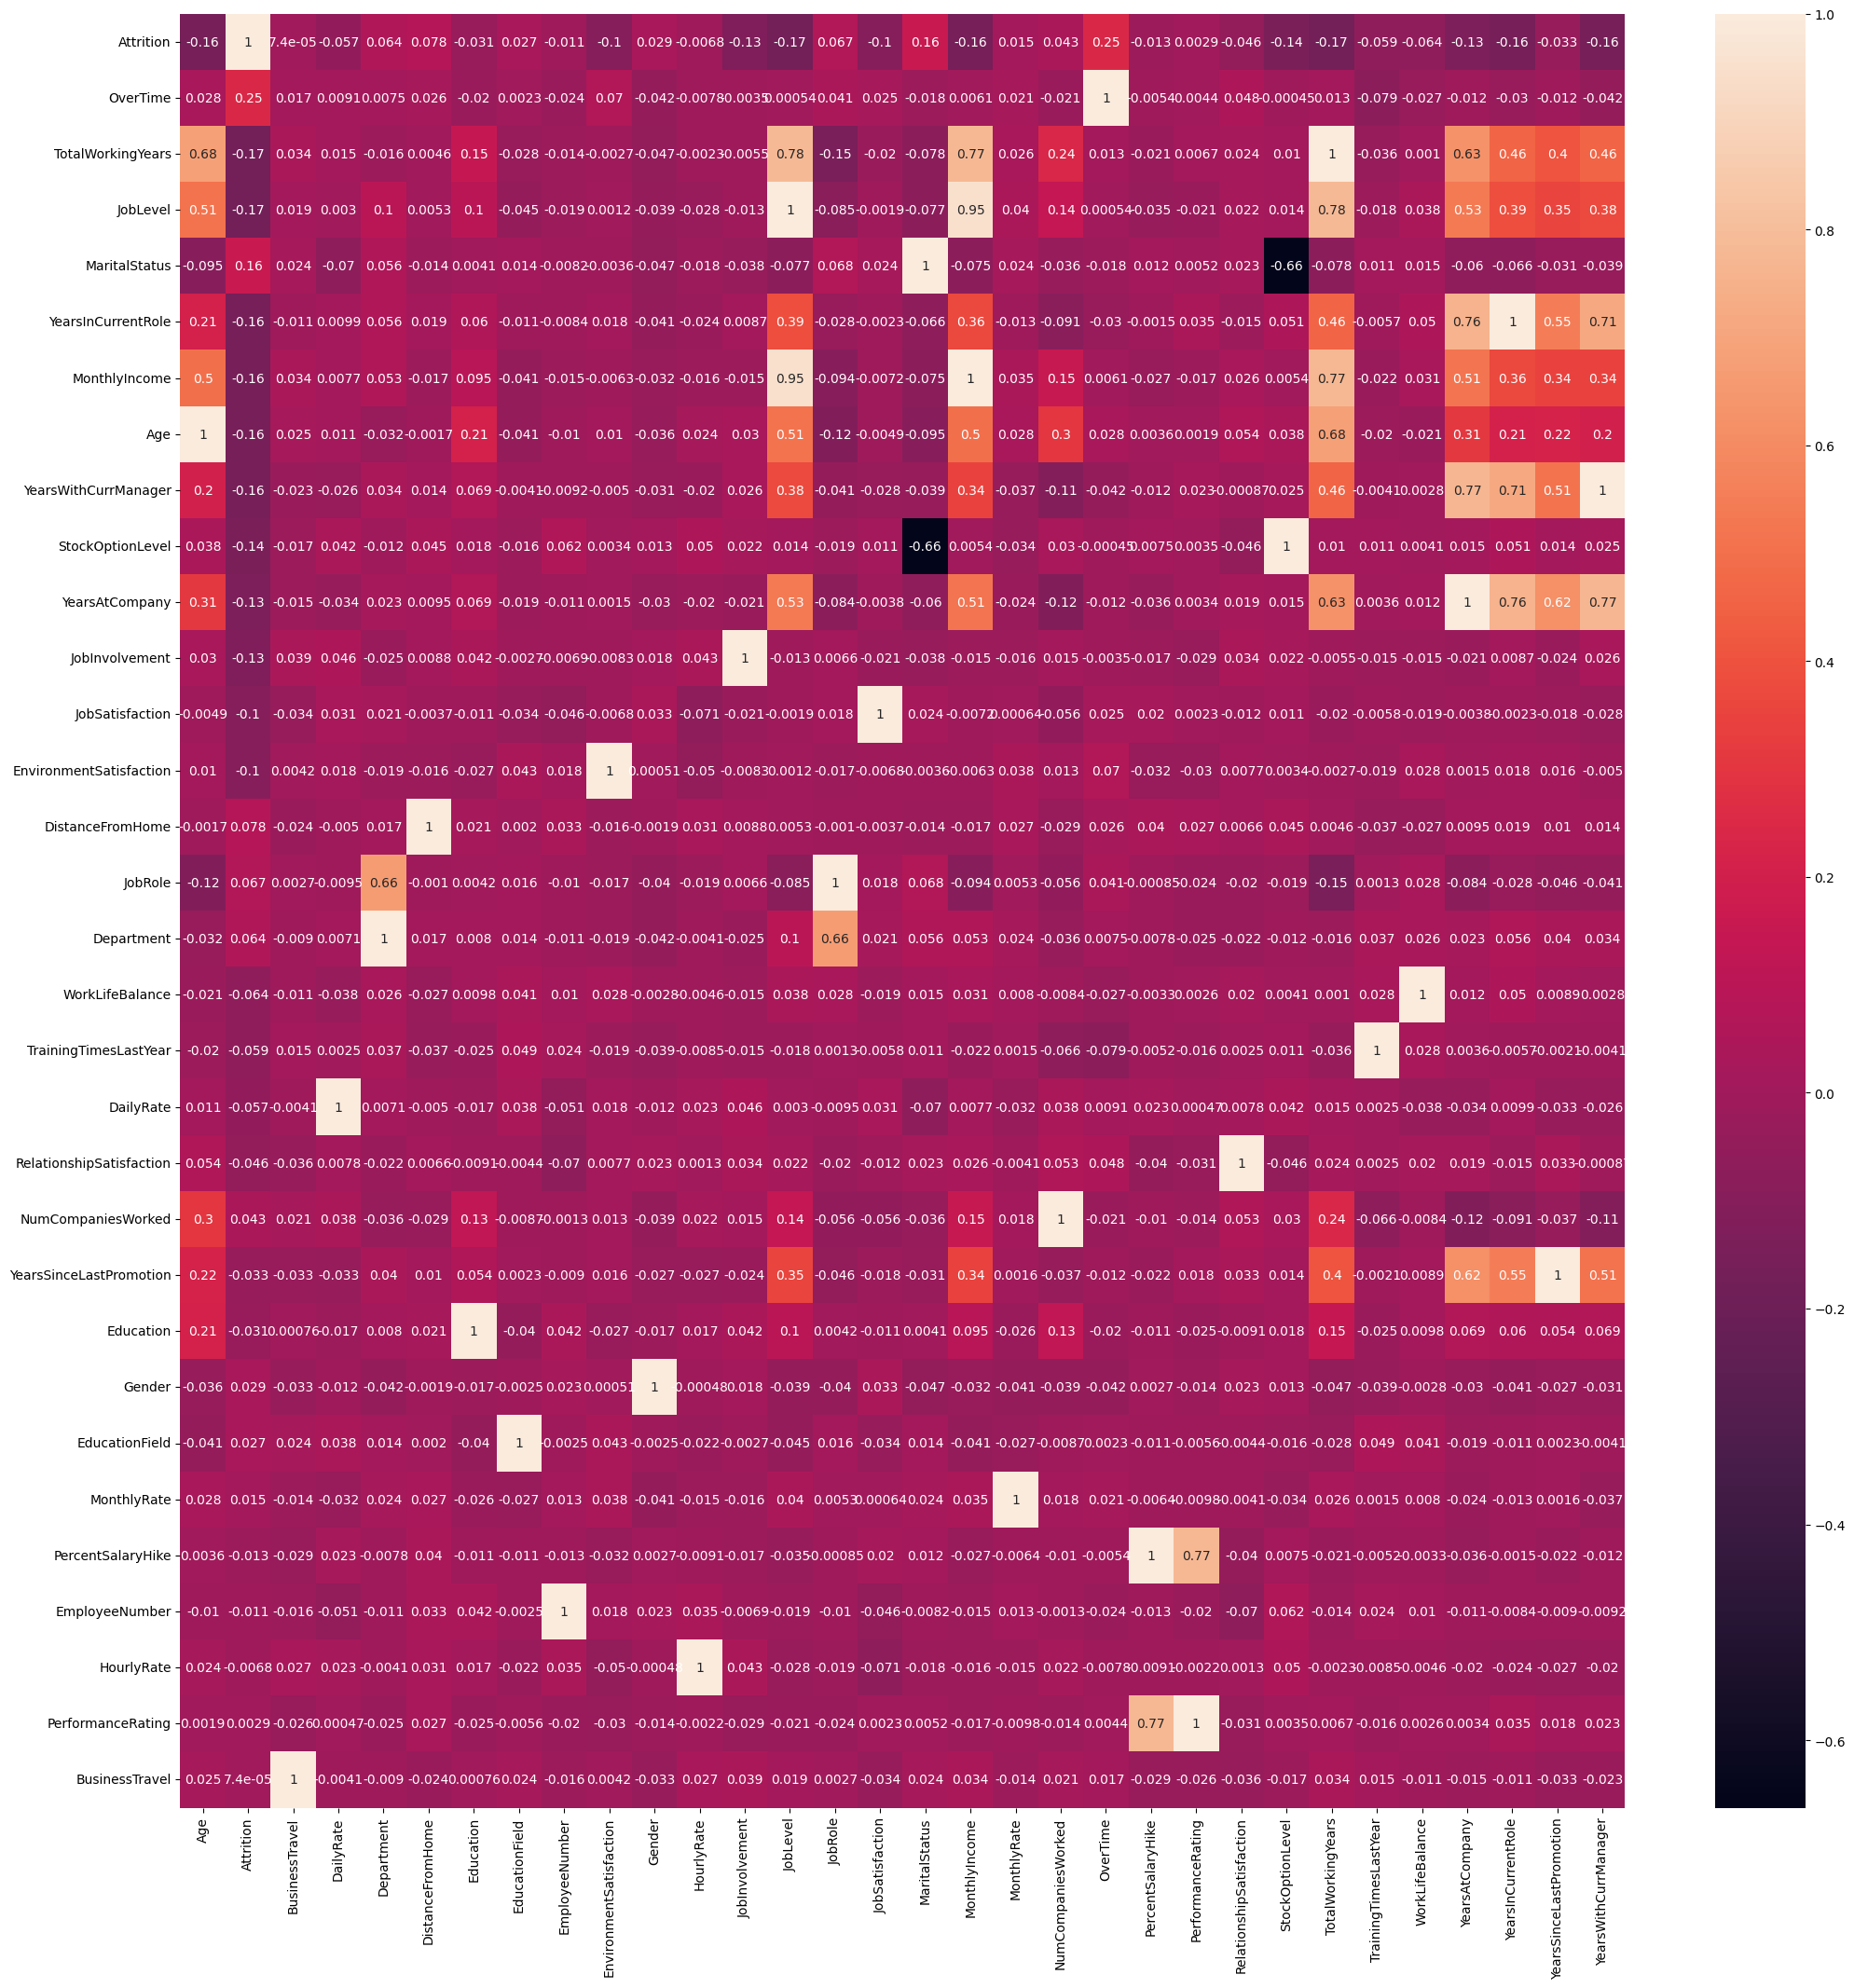

In [ ]:
_, ax= plt.subplots(figsize=(25, 25))
corr = df.corr()
sns.heatmap(corr.sort_values(by='Attrition', ascending=False, key=abs), annot=True)

In [ ]:
relevant_features = corr['Attrition'].abs().sort_values(ascending=False)[:12]
relevant_features = dict(relevant_features[1:])
print(relevant_features)
selected_features = list(relevant_features.keys())
print(selected_features)

{'OverTime': 0.24611799424580436, 'TotalWorkingYears': 0.17106324613622612, 'JobLevel': 0.16910475093102761, 'MaritalStatus': 0.1620702346570145, 'YearsInCurrentRole': 0.16054500426770077, 'MonthlyIncome': 0.15983958238498852, 'Age': 0.15920500686577962, 'YearsWithCurrManager': 0.1561993159016288, 'StockOptionLevel': 0.13714491893332562, 'YearsAtCompany': 0.13439221398997708, 'JobInvolvement': 0.13001595678605374}
['OverTime', 'TotalWorkingYears', 'JobLevel', 'MaritalStatus', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement']


In [ ]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
min_max = MinMaxScaler()
x = min_max.fit(x).transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [ ]:
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    print("*"*20)

LogisticRegression: 0.8885869565217391
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.71      0.25      0.37        48

    accuracy                           0.89       368
   macro avg       0.80      0.62      0.65       368
weighted avg       0.87      0.89      0.86       368

********************
SVC: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       320
           1       1.00      0.12      0.22        48

    accuracy                           0.89       368
   macro avg       0.94      0.56      0.58       368
weighted avg       0.90      0.89      0.84       368

********************
KNeighborsClassifier: 0.8614130434782609
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       320
           1       0.38      0.10      0.16        48

    accuracy                        